<a href="https://colab.research.google.com/github/jason96819/Book_Rating_Regressor/blob/main/Book_data_Training_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
def generate_data():
    df = pd.read_csv('./drive/MyDrive/data/book/book_rating_predict_data.csv')
    df = df.drop(columns = 'Unnamed: 0')

    y = df['Book-Rating']
    X = df.drop(columns = 'Book-Rating')

    le = LabelEncoder()

    for column in X.columns:
        encoded_col = le.fit_transform(X[column])
        X[column] = encoded_col

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=177)

    return X, y, X_train, X_test, y_train, y_test

In [ ]:
X, y, train_X, test_X, train_y, test_y = generate_data()

In [ ]:
# 1.lr / 2. dt / 3. rf / 4. xgb / 5. lgb / 6. catb

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

In [ ]:
lr = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=77)
lasso = Lasso(alpha = 0.01, random_state=77)
enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=77)
dt = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=77)
rf = RandomForestRegressor(n_estimators=500, max_depth=9, min_samples_split=50,
                                              min_samples_leaf=5, random_state=77, n_jobs=-1)
xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1)
lightgbm = lgb.LGBMRegressor(n_estimators=500, max_depth=9, min_child_weight=5, n_jobs=-1)
catboost = CatBoostRegressor(iterations=500, max_depth=9, learning_rate=0.1)

In [ ]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(train_X), start=1), desc=f'{model_name} Cross Validations...', total=10):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
        clf = model.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse = RMSE(y_test, pred)
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSE: {r:.4f}')
    print(f'\n{model_name} mean RMSE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [ ]:
models = []
scores = []
for model in [lr, ridge, lasso, enet, dt, rf, xgboost, lightgbm, catboost]:
    model_name, mean_score = print_rmse_score(model)
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|██████████| 10/10 [00:01<00:00,  6.18it/s]


1 FOLDS: LinearRegression RMSE: 3.8271
2 FOLDS: LinearRegression RMSE: 3.8300
3 FOLDS: LinearRegression RMSE: 3.8200
4 FOLDS: LinearRegression RMSE: 3.8301
5 FOLDS: LinearRegression RMSE: 3.8327
6 FOLDS: LinearRegression RMSE: 3.8250
7 FOLDS: LinearRegression RMSE: 3.8389
8 FOLDS: LinearRegression RMSE: 3.8253
9 FOLDS: LinearRegression RMSE: 3.8163
10 FOLDS: LinearRegression RMSE: 3.8236

LinearRegression mean RMSE: 3.8269


Ridge Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 17.33it/s]


1 FOLDS: Ridge RMSE: 3.8271
2 FOLDS: Ridge RMSE: 3.8300
3 FOLDS: Ridge RMSE: 3.8200
4 FOLDS: Ridge RMSE: 3.8301
5 FOLDS: Ridge RMSE: 3.8327
6 FOLDS: Ridge RMSE: 3.8250
7 FOLDS: Ridge RMSE: 3.8389
8 FOLDS: Ridge RMSE: 3.8253
9 FOLDS: Ridge RMSE: 3.8163
10 FOLDS: Ridge RMSE: 3.8236

Ridge mean RMSE: 3.8269


Lasso Cross Validations...: 100%|██████████| 10/10 [00:01<00:00,  7.21it/s]


1 FOLDS: Lasso RMSE: 3.8273
2 FOLDS: Lasso RMSE: 3.8300
3 FOLDS: Lasso RMSE: 3.8203
4 FOLDS: Lasso RMSE: 3.8300
5 FOLDS: Lasso RMSE: 3.8328
6 FOLDS: Lasso RMSE: 3.8252
7 FOLDS: Lasso RMSE: 3.8390
8 FOLDS: Lasso RMSE: 3.8257
9 FOLDS: Lasso RMSE: 3.8164
10 FOLDS: Lasso RMSE: 3.8237

Lasso mean RMSE: 3.8270


ElasticNet Cross Validations...: 100%|██████████| 10/10 [00:01<00:00,  7.47it/s]


1 FOLDS: ElasticNet RMSE: 3.8272
2 FOLDS: ElasticNet RMSE: 3.8300
3 FOLDS: ElasticNet RMSE: 3.8202
4 FOLDS: ElasticNet RMSE: 3.8301
5 FOLDS: ElasticNet RMSE: 3.8327
6 FOLDS: ElasticNet RMSE: 3.8251
7 FOLDS: ElasticNet RMSE: 3.8389
8 FOLDS: ElasticNet RMSE: 3.8256
9 FOLDS: ElasticNet RMSE: 3.8164
10 FOLDS: ElasticNet RMSE: 3.8237

ElasticNet mean RMSE: 3.8270


DecisionTreeRegressor Cross Validations...: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


1 FOLDS: DecisionTreeRegressor RMSE: 3.7846
2 FOLDS: DecisionTreeRegressor RMSE: 3.7776
3 FOLDS: DecisionTreeRegressor RMSE: 3.7627
4 FOLDS: DecisionTreeRegressor RMSE: 3.7733
5 FOLDS: DecisionTreeRegressor RMSE: 3.7774
6 FOLDS: DecisionTreeRegressor RMSE: 3.7692
7 FOLDS: DecisionTreeRegressor RMSE: 3.7761
8 FOLDS: DecisionTreeRegressor RMSE: 3.7659
9 FOLDS: DecisionTreeRegressor RMSE: 3.7570
10 FOLDS: DecisionTreeRegressor RMSE: 3.7634

DecisionTreeRegressor mean RMSE: 3.7707


RandomForestRegressor Cross Validations...: 100%|██████████| 10/10 [1:05:00<00:00, 390.07s/it]


1 FOLDS: RandomForestRegressor RMSE: 3.7371
2 FOLDS: RandomForestRegressor RMSE: 3.7158
3 FOLDS: RandomForestRegressor RMSE: 3.6967
4 FOLDS: RandomForestRegressor RMSE: 3.7084
5 FOLDS: RandomForestRegressor RMSE: 3.7104
6 FOLDS: RandomForestRegressor RMSE: 3.7046
7 FOLDS: RandomForestRegressor RMSE: 3.7110
8 FOLDS: RandomForestRegressor RMSE: 3.6976
9 FOLDS: RandomForestRegressor RMSE: 3.6931
10 FOLDS: RandomForestRegressor RMSE: 3.6985

RandomForestRegressor mean RMSE: 3.7073


XGBRegressor Cross Validations...: 100%|██████████| 10/10 [28:41<00:00, 172.13s/it]


1 FOLDS: XGBRegressor RMSE: 3.7860
2 FOLDS: XGBRegressor RMSE: 3.6582
3 FOLDS: XGBRegressor RMSE: 3.5633
4 FOLDS: XGBRegressor RMSE: 3.5497
5 FOLDS: XGBRegressor RMSE: 3.5089
6 FOLDS: XGBRegressor RMSE: 3.4794
7 FOLDS: XGBRegressor RMSE: 3.4641
8 FOLDS: XGBRegressor RMSE: 3.4428
9 FOLDS: XGBRegressor RMSE: 3.4270
10 FOLDS: XGBRegressor RMSE: 3.4254

XGBRegressor mean RMSE: 3.5305


LGBMRegressor Cross Validations...: 100%|██████████| 10/10 [00:59<00:00,  5.93s/it]


1 FOLDS: LGBMRegressor RMSE: 3.6426
2 FOLDS: LGBMRegressor RMSE: 3.5924
3 FOLDS: LGBMRegressor RMSE: 3.5533
4 FOLDS: LGBMRegressor RMSE: 3.5655
5 FOLDS: LGBMRegressor RMSE: 3.5580
6 FOLDS: LGBMRegressor RMSE: 3.5370
7 FOLDS: LGBMRegressor RMSE: 3.5447
8 FOLDS: LGBMRegressor RMSE: 3.5338
9 FOLDS: LGBMRegressor RMSE: 3.5188
10 FOLDS: LGBMRegressor RMSE: 3.5208

LGBMRegressor mean RMSE: 3.5567


CatBoostRegressor Cross Validations...:   0%|          | 0/10 [00:00<?, ?it/s]

0:	learn: 3.8198826	total: 17.6ms	remaining: 8.78s
1:	learn: 3.8123468	total: 33.6ms	remaining: 8.37s
2:	learn: 3.8063511	total: 47.5ms	remaining: 7.87s
3:	learn: 3.8000986	total: 63.2ms	remaining: 7.84s
4:	learn: 3.7937623	total: 78.1ms	remaining: 7.73s
5:	learn: 3.7898587	total: 92.3ms	remaining: 7.6s
6:	learn: 3.7852707	total: 107ms	remaining: 7.52s
7:	learn: 3.7826651	total: 120ms	remaining: 7.41s
8:	learn: 3.7785435	total: 134ms	remaining: 7.33s
9:	learn: 3.7757008	total: 151ms	remaining: 7.42s
10:	learn: 3.7726258	total: 166ms	remaining: 7.38s
11:	learn: 3.7702982	total: 180ms	remaining: 7.31s
12:	learn: 3.7669607	total: 194ms	remaining: 7.27s
13:	learn: 3.7639700	total: 208ms	remaining: 7.23s
14:	learn: 3.7619248	total: 225ms	remaining: 7.26s
15:	learn: 3.7605556	total: 239ms	remaining: 7.22s
16:	learn: 3.7579879	total: 255ms	remaining: 7.24s
17:	learn: 3.7559485	total: 269ms	remaining: 7.21s
18:	learn: 3.7537507	total: 283ms	remaining: 7.17s
19:	learn: 3.7515437	total: 297ms	re

CatBoostRegressor Cross Validations...:  10%|█         | 1/10 [00:09<01:22,  9.21s/it]

0:	learn: 3.8230325	total: 25.7ms	remaining: 12.8s
1:	learn: 3.8148741	total: 54.3ms	remaining: 13.5s
2:	learn: 3.8093669	total: 74.3ms	remaining: 12.3s
3:	learn: 3.8061557	total: 94.2ms	remaining: 11.7s
4:	learn: 3.7991141	total: 115ms	remaining: 11.4s
5:	learn: 3.7953534	total: 136ms	remaining: 11.2s
6:	learn: 3.7912852	total: 157ms	remaining: 11.1s
7:	learn: 3.7892759	total: 177ms	remaining: 10.9s
8:	learn: 3.7857875	total: 197ms	remaining: 10.7s
9:	learn: 3.7812488	total: 218ms	remaining: 10.7s
10:	learn: 3.7796086	total: 244ms	remaining: 10.8s
11:	learn: 3.7772570	total: 263ms	remaining: 10.7s
12:	learn: 3.7733227	total: 284ms	remaining: 10.6s
13:	learn: 3.7718995	total: 304ms	remaining: 10.6s
14:	learn: 3.7696079	total: 324ms	remaining: 10.5s
15:	learn: 3.7666180	total: 358ms	remaining: 10.8s
16:	learn: 3.7626666	total: 380ms	remaining: 10.8s
17:	learn: 3.7610519	total: 401ms	remaining: 10.7s
18:	learn: 3.7594727	total: 422ms	remaining: 10.7s
19:	learn: 3.7581133	total: 441ms	rem

CatBoostRegressor Cross Validations...:  20%|██        | 2/10 [00:21<01:29, 11.24s/it]

0:	learn: 3.8234738	total: 34.2ms	remaining: 17.1s
1:	learn: 3.8160821	total: 62.9ms	remaining: 15.7s
2:	learn: 3.8104770	total: 91.2ms	remaining: 15.1s
3:	learn: 3.8041910	total: 130ms	remaining: 16.1s
4:	learn: 3.7980305	total: 160ms	remaining: 15.8s
5:	learn: 3.7945023	total: 189ms	remaining: 15.6s
6:	learn: 3.7910400	total: 223ms	remaining: 15.7s
7:	learn: 3.7882732	total: 258ms	remaining: 15.9s
8:	learn: 3.7856609	total: 286ms	remaining: 15.6s
9:	learn: 3.7828123	total: 314ms	remaining: 15.4s
10:	learn: 3.7795697	total: 346ms	remaining: 15.4s
11:	learn: 3.7763326	total: 373ms	remaining: 15.2s
12:	learn: 3.7731511	total: 399ms	remaining: 15s
13:	learn: 3.7715828	total: 426ms	remaining: 14.8s
14:	learn: 3.7691445	total: 450ms	remaining: 14.6s
15:	learn: 3.7672299	total: 484ms	remaining: 14.7s
16:	learn: 3.7648505	total: 514ms	remaining: 14.6s
17:	learn: 3.7634081	total: 540ms	remaining: 14.5s
18:	learn: 3.7613837	total: 569ms	remaining: 14.4s
19:	learn: 3.7603143	total: 596ms	remain

CatBoostRegressor Cross Validations...:  30%|███       | 3/10 [00:39<01:38, 14.03s/it]

498:	learn: 3.4683241	total: 16.9s	remaining: 33.9ms
499:	learn: 3.4677748	total: 16.9s	remaining: 0us
0:	learn: 3.8241539	total: 41.7ms	remaining: 20.8s
1:	learn: 3.8156547	total: 82ms	remaining: 20.4s
2:	learn: 3.8084170	total: 120ms	remaining: 19.8s
3:	learn: 3.8037205	total: 155ms	remaining: 19.2s
4:	learn: 3.7979951	total: 203ms	remaining: 20s
5:	learn: 3.7931510	total: 237ms	remaining: 19.5s
6:	learn: 3.7883157	total: 276ms	remaining: 19.4s
7:	learn: 3.7846572	total: 313ms	remaining: 19.3s
8:	learn: 3.7808993	total: 355ms	remaining: 19.4s
9:	learn: 3.7790379	total: 386ms	remaining: 18.9s
10:	learn: 3.7754072	total: 427ms	remaining: 19s
11:	learn: 3.7735325	total: 463ms	remaining: 18.8s
12:	learn: 3.7720404	total: 503ms	remaining: 18.8s
13:	learn: 3.7692675	total: 535ms	remaining: 18.6s
14:	learn: 3.7671952	total: 569ms	remaining: 18.4s
15:	learn: 3.7663502	total: 601ms	remaining: 18.2s
16:	learn: 3.7652196	total: 641ms	remaining: 18.2s
17:	learn: 3.7624833	total: 673ms	remaining:

CatBoostRegressor Cross Validations...:  40%|████      | 4/10 [01:00<01:40, 16.71s/it]

499:	learn: 3.4854782	total: 20.4s	remaining: 0us
0:	learn: 3.8250584	total: 43.2ms	remaining: 21.6s
1:	learn: 3.8176961	total: 93ms	remaining: 23.2s
2:	learn: 3.8098739	total: 136ms	remaining: 22.6s
3:	learn: 3.8054173	total: 176ms	remaining: 21.8s
4:	learn: 3.7997817	total: 227ms	remaining: 22.5s
5:	learn: 3.7956845	total: 272ms	remaining: 22.4s
6:	learn: 3.7914493	total: 313ms	remaining: 22.1s
7:	learn: 3.7877324	total: 355ms	remaining: 21.8s
8:	learn: 3.7859982	total: 398ms	remaining: 21.7s
9:	learn: 3.7825791	total: 438ms	remaining: 21.4s
10:	learn: 3.7797595	total: 482ms	remaining: 21.4s
11:	learn: 3.7781851	total: 527ms	remaining: 21.4s
12:	learn: 3.7753881	total: 568ms	remaining: 21.3s
13:	learn: 3.7720966	total: 607ms	remaining: 21.1s
14:	learn: 3.7703077	total: 648ms	remaining: 21s
15:	learn: 3.7693375	total: 690ms	remaining: 20.9s
16:	learn: 3.7679577	total: 731ms	remaining: 20.8s
17:	learn: 3.7646222	total: 780ms	remaining: 20.9s
18:	learn: 3.7625774	total: 822ms	remaining:

CatBoostRegressor Cross Validations...:  50%|█████     | 5/10 [01:24<01:37, 19.51s/it]

497:	learn: 3.5053544	total: 23.9s	remaining: 96.1ms
498:	learn: 3.5048767	total: 24s	remaining: 48ms
499:	learn: 3.5046829	total: 24s	remaining: 0us
0:	learn: 3.8262839	total: 49.1ms	remaining: 24.5s
1:	learn: 3.8182065	total: 100ms	remaining: 24.9s
2:	learn: 3.8116762	total: 147ms	remaining: 24.4s
3:	learn: 3.8061299	total: 195ms	remaining: 24.2s
4:	learn: 3.8013053	total: 253ms	remaining: 25.1s
5:	learn: 3.7963979	total: 305ms	remaining: 25.1s
6:	learn: 3.7914901	total: 356ms	remaining: 25s
7:	learn: 3.7879299	total: 404ms	remaining: 24.9s
8:	learn: 3.7852035	total: 449ms	remaining: 24.5s
9:	learn: 3.7829951	total: 499ms	remaining: 24.5s
10:	learn: 3.7792563	total: 550ms	remaining: 24.4s
11:	learn: 3.7772816	total: 595ms	remaining: 24.2s
12:	learn: 3.7748907	total: 638ms	remaining: 23.9s
13:	learn: 3.7712117	total: 684ms	remaining: 23.7s
14:	learn: 3.7694936	total: 734ms	remaining: 23.7s
15:	learn: 3.7679325	total: 779ms	remaining: 23.6s
16:	learn: 3.7662398	total: 829ms	remaining: 

CatBoostRegressor Cross Validations...:  60%|██████    | 6/10 [01:52<01:29, 22.35s/it]

0:	learn: 3.8256121	total: 65ms	remaining: 32.4s
1:	learn: 3.8185534	total: 117ms	remaining: 29.2s
2:	learn: 3.8114335	total: 171ms	remaining: 28.3s
3:	learn: 3.8049363	total: 239ms	remaining: 29.7s
4:	learn: 3.7996782	total: 302ms	remaining: 29.9s
5:	learn: 3.7950766	total: 360ms	remaining: 29.7s
6:	learn: 3.7911445	total: 417ms	remaining: 29.3s
7:	learn: 3.7875275	total: 470ms	remaining: 28.9s
8:	learn: 3.7849519	total: 527ms	remaining: 28.7s
9:	learn: 3.7834169	total: 582ms	remaining: 28.5s
10:	learn: 3.7802566	total: 632ms	remaining: 28.1s
11:	learn: 3.7781176	total: 696ms	remaining: 28.3s
12:	learn: 3.7747660	total: 754ms	remaining: 28.2s
13:	learn: 3.7717641	total: 807ms	remaining: 28s
14:	learn: 3.7698610	total: 860ms	remaining: 27.8s
15:	learn: 3.7677340	total: 910ms	remaining: 27.5s
16:	learn: 3.7663833	total: 968ms	remaining: 27.5s
17:	learn: 3.7648891	total: 1.02s	remaining: 27.4s
18:	learn: 3.7626525	total: 1.07s	remaining: 27.2s
19:	learn: 3.7615853	total: 1.13s	remaining:

CatBoostRegressor Cross Validations...:  70%|███████   | 7/10 [02:24<01:16, 25.49s/it]

0:	learn: 3.8263392	total: 69.2ms	remaining: 34.5s
1:	learn: 3.8187534	total: 137ms	remaining: 34.1s
2:	learn: 3.8121518	total: 197ms	remaining: 32.6s
3:	learn: 3.8055965	total: 264ms	remaining: 32.7s
4:	learn: 3.8008119	total: 327ms	remaining: 32.4s
5:	learn: 3.7956230	total: 395ms	remaining: 32.5s
6:	learn: 3.7916703	total: 462ms	remaining: 32.6s
7:	learn: 3.7881569	total: 544ms	remaining: 33.5s
8:	learn: 3.7860006	total: 604ms	remaining: 33s
9:	learn: 3.7838520	total: 670ms	remaining: 32.8s
10:	learn: 3.7808569	total: 727ms	remaining: 32.3s
11:	learn: 3.7772807	total: 793ms	remaining: 32.3s
12:	learn: 3.7742828	total: 857ms	remaining: 32.1s
13:	learn: 3.7714868	total: 925ms	remaining: 32.1s
14:	learn: 3.7694896	total: 990ms	remaining: 32s
15:	learn: 3.7670948	total: 1.05s	remaining: 31.8s
16:	learn: 3.7654997	total: 1.11s	remaining: 31.6s
17:	learn: 3.7634540	total: 1.17s	remaining: 31.3s
18:	learn: 3.7613676	total: 1.24s	remaining: 31.4s
19:	learn: 3.7593896	total: 1.3s	remaining: 

CatBoostRegressor Cross Validations...:  80%|████████  | 8/10 [03:00<00:57, 28.78s/it]

499:	learn: 3.5245845	total: 35.3s	remaining: 0us
0:	learn: 3.8268945	total: 101ms	remaining: 50.3s
1:	learn: 3.8197528	total: 172ms	remaining: 42.9s
2:	learn: 3.8124156	total: 240ms	remaining: 39.8s
3:	learn: 3.8066258	total: 313ms	remaining: 38.8s
4:	learn: 3.8019294	total: 379ms	remaining: 37.5s
5:	learn: 3.7971389	total: 454ms	remaining: 37.4s
6:	learn: 3.7920499	total: 528ms	remaining: 37.2s
7:	learn: 3.7894930	total: 591ms	remaining: 36.3s
8:	learn: 3.7863286	total: 668ms	remaining: 36.4s
9:	learn: 3.7847043	total: 742ms	remaining: 36.4s
10:	learn: 3.7815228	total: 810ms	remaining: 36s
11:	learn: 3.7797187	total: 876ms	remaining: 35.6s
12:	learn: 3.7766389	total: 954ms	remaining: 35.8s
13:	learn: 3.7751408	total: 1.02s	remaining: 35.3s
14:	learn: 3.7727958	total: 1.08s	remaining: 35.1s
15:	learn: 3.7715625	total: 1.15s	remaining: 34.8s
16:	learn: 3.7701440	total: 1.22s	remaining: 34.8s
17:	learn: 3.7678710	total: 1.29s	remaining: 34.5s
18:	learn: 3.7656911	total: 1.35s	remaining:

CatBoostRegressor Cross Validations...:  90%|█████████ | 9/10 [03:39<00:32, 32.14s/it]

498:	learn: 3.5275756	total: 38.8s	remaining: 77.8ms
499:	learn: 3.5273269	total: 38.9s	remaining: 0us
0:	learn: 3.8255457	total: 82.9ms	remaining: 41.4s
1:	learn: 3.8185820	total: 167ms	remaining: 41.6s
2:	learn: 3.8117401	total: 242ms	remaining: 40.2s
3:	learn: 3.8056926	total: 325ms	remaining: 40.3s
4:	learn: 3.7997704	total: 401ms	remaining: 39.7s
5:	learn: 3.7951840	total: 476ms	remaining: 39.2s
6:	learn: 3.7905588	total: 564ms	remaining: 39.7s
7:	learn: 3.7873041	total: 636ms	remaining: 39.1s
8:	learn: 3.7841989	total: 714ms	remaining: 39s
9:	learn: 3.7819104	total: 791ms	remaining: 38.8s
10:	learn: 3.7787324	total: 876ms	remaining: 38.9s
11:	learn: 3.7753192	total: 959ms	remaining: 39s
12:	learn: 3.7731208	total: 1.04s	remaining: 39s
13:	learn: 3.7718875	total: 1.12s	remaining: 39s
14:	learn: 3.7697330	total: 1.2s	remaining: 38.7s
15:	learn: 3.7673914	total: 1.27s	remaining: 38.5s
16:	learn: 3.7650726	total: 1.34s	remaining: 38.2s
17:	learn: 3.7633585	total: 1.42s	remaining: 37.

CatBoostRegressor Cross Validations...: 100%|██████████| 10/10 [04:24<00:00, 26.41s/it]

498:	learn: 3.5270893	total: 43.7s	remaining: 87.7ms
499:	learn: 3.5267766	total: 43.8s	remaining: 0us
1 FOLDS: CatBoostRegressor RMSE: 3.6697
2 FOLDS: CatBoostRegressor RMSE: 3.6218
3 FOLDS: CatBoostRegressor RMSE: 3.5843
4 FOLDS: CatBoostRegressor RMSE: 3.5939
5 FOLDS: CatBoostRegressor RMSE: 3.5853
6 FOLDS: CatBoostRegressor RMSE: 3.5708
7 FOLDS: CatBoostRegressor RMSE: 3.5711
8 FOLDS: CatBoostRegressor RMSE: 3.5684
9 FOLDS: CatBoostRegressor RMSE: 3.5520
10 FOLDS: CatBoostRegressor RMSE: 3.5529

CatBoostRegressor mean RMSE: 3.5870


In [ ]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,LinearRegression,3.826897
1,Ridge,3.826897
2,Lasso,3.827025
3,ElasticNet,3.826982
4,DecisionTreeRegressor,3.770715
5,RandomForestRegressor,3.707322
6,XGBRegressor,3.530496
7,LGBMRegressor,3.556696
8,CatBoostRegressor,3.587026


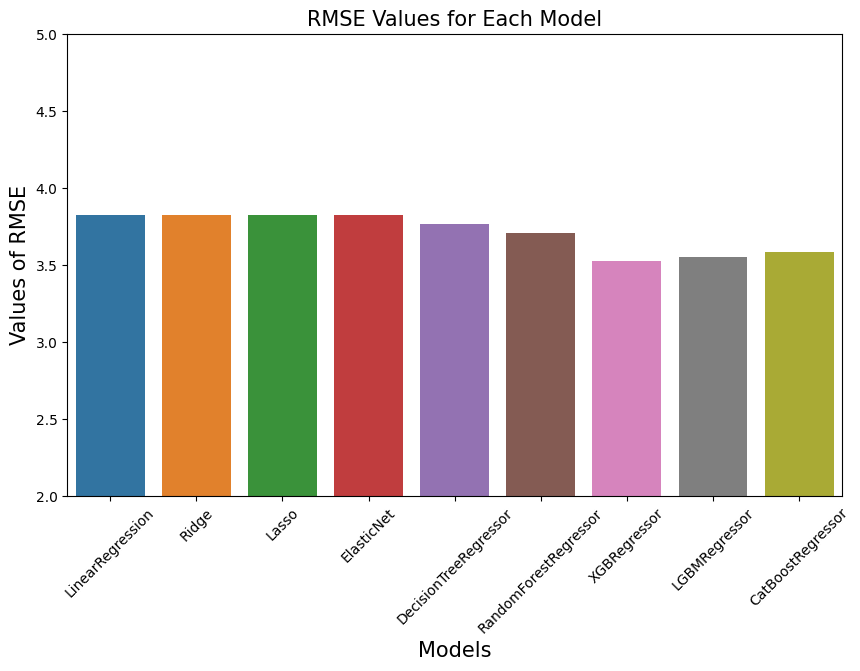

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=result_df['Model'], y=result_df['Score'], ax=ax)
ax.set_xticklabels(result_df['Model'], rotation=45)
ax.set_xlabel('Models', fontsize=15)
ax.set_ylabel('Values of RMSE', fontsize=15)
ax.set_ylim(2, 5)
ax.set_title('RMSE Values for Each Model', fontsize=15)
plt.show()

9개의 간단한 회귀 모델들을 돌려본 결과 RMSE가 가장 XGB 모델을 사용해 하이퍼파라미터 튜닝을 한 후, 조금 더 낮은 RMSE를 출력해보겠습니다.

# XGBoost

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.8 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
from optuna.samplers import TPESampler

sampler = TPESampler()

In [ ]:
X, y, X_train, X_test, y_train, y_test = generate_data()

In [ ]:
def objective(trial):

    # 하이퍼파라미터 범위 설정
    param = {
    'lambda': trial.suggest_float('lambda', 1e-3, 0.1),
    'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1),
    'subsample': trial.suggest_float('subsample', 0.4, 1),
    'learning_rate': trial.suggest_float('learning_rate',0.0001, 0.1),
    'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
    'max_depth': trial.suggest_int('max_depth', 2,30),
    'min_child_weight': trial.suggest_int('min_child_weight', 2, 50),
    }

    # XGBoost 회귀 모델 생성
    XGB_model = XGBRegressor(**param)
    XGB_model.fit(X_train, y_train)

    # 검증 데이터로 예측
    pred = XGB_model.predict(X_test)

    # RMSE를 최소화하는 것을 목표로 함
    rmse = mean_squared_error(y_test, pred, squared=False)

    return rmse

In [ ]:
study_xgb = optuna.create_study(
    direction='minimize',
    study_name = 'Xgboost Optuna',
    sampler=sampler
)

study_xgb.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print("Best trial:")
print("Value: ", study_xgb.best_trial.params)
print("RMSE: ", study_xgb.best_value)

# 최적의 하이퍼파라미터를 사용하여 랜덤 포레스트 모델 생성 및 학습
best_params_xgb = study_xgb.best_params
best_model_xgb = XGBRegressor(**best_params_xgb)
best_model_xgb.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = best_model_xgb.predict(X_test)

# 모델 평가
XGB_mse = mean_squared_error(y_test, y_pred)
XGB_rmse = mean_squared_error(y_test, y_pred, squared=False)
XGB_r2 = r2_score(y_test, y_pred)
XGB_adj_r2 = adj_r2_score(y_test, y_pred)

print("Mean Squared Error:", XGB_mse)
print("Root Mean Squared Error:", XGB_rmse)
print("R-squared:", XGB_r2)
print("Adj-R-squared:", XGB_adj_r2)

[I 2023-08-10 14:09:20,790] A new study created in memory with name: Xgboost Optuna
[I 2023-08-10 14:13:31,626] Trial 0 finished with value: 3.5379534847895773 and parameters: {'lambda': 0.05579176612405577, 'alpha': 0.8097319150942736, 'colsample_bytree': 0.9370151069341109, 'subsample': 0.9510304821708928, 'learning_rate': 0.05903528277783505, 'n_estimators': 842, 'max_depth': 5, 'min_child_weight': 33}. Best is trial 0 with value: 3.5379534847895773.
[I 2023-08-10 14:15:28,612] Trial 1 finished with value: 3.5091367149197437 and parameters: {'lambda': 0.04883275455999738, 'alpha': 0.7508887694871264, 'colsample_bytree': 0.7321207871858044, 'subsample': 0.9710059801383014, 'learning_rate': 0.0878364147817376, 'n_estimators': 314, 'max_depth': 7, 'min_child_weight': 15}. Best is trial 1 with value: 3.5091367149197437.
[I 2023-08-10 14:17:14,880] Trial 2 finished with value: 3.5986487017989957 and parameters: {'lambda': 0.09946033263094942, 'alpha': 0.5645212946173868, 'colsample_bytre

Best trial:
Value:  {'lambda': 0.01893894583772941, 'alpha': 0.7353193933493986, 'colsample_bytree': 0.8061708882377794, 'subsample': 0.9137084378731792, 'learning_rate': 0.09278326974333914, 'n_estimators': 898, 'max_depth': 8, 'min_child_weight': 30}
RMSE:  3.4056941106962912
Mean Squared Error: 11.5987523756314
Root Mean Squared Error: 3.4056941106962912
R-squared: 0.20899012634441216
Adj-R-squared: 0.208942186642613


In [ ]:
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=177)

rmse_list = []
r2_list = []
n_iter =0

for train_index, test_index in S_kfold.split(X, y):
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    best_params_xgb = {'lambda': 0.01893894583772941, 'alpha': 0.7353193933493986,
                                    'colsample_bytree': 0.8061708882377794, 'subsample': 0.9137084378731792,            # 하다가 런타임이 끊겨서 best_params_xgb를 새로 정의
                                    'learning_rate': 0.09278326974333914, 'n_estimators': 898,
                                    'max_depth': 8, 'min_child_weight': 30}

    # best_params_xgb = study_xgb.best_params
    best_model_xgb = XGBRegressor(**best_params_xgb)
    best_model_xgb.fit(x_train, y_train)
    pred = best_model_xgb.predict(x_test)
    n_iter += 1

    XGB_rmse = mean_squared_error(y_test, pred, squared=False)
    XGB_r2 = r2_score(y_test, pred)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]

    print('\n#{0} RMSE : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
        .format(n_iter, XGB_rmse, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    rmse_list.append(XGB_rmse)
    r2_list.append(XGB_r2)

print()
print("="*50)
print('#kfold가5일 때 평균 RMSE:', np.mean(rmse_list))
print('\n#kfold가5일 때 평균 결정계수:', np.mean(r2_list))
print("="*50)


#1 RMSE : 3.412283426989645,  학습 데이터 크기 : 660044,  검증 데이터 크기 : 165012
#1 검증 세트 인덱스 : [    17     19     21 ... 825042 825051 825052]

#2 RMSE : 3.415014545406934,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#2 검증 세트 인덱스 : [     1      3      4 ... 825024 825039 825054]

#3 RMSE : 3.4164142712857846,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#3 검증 세트 인덱스 : [    20     22     31 ... 825048 825049 825053]

#4 RMSE : 3.4174627250782588,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#4 검증 세트 인덱스 : [     6      7     12 ... 825043 825050 825055]

#5 RMSE : 3.4154720760252095,  학습 데이터 크기 : 660045,  검증 데이터 크기 : 165011
#5 검증 세트 인덱스 : [     0      2      5 ... 825044 825045 825046]

#kfold가5일 때 평균 RMSE: 3.4153294089571666

#kfold가5일 때 평균 결정계수: 0.20609007928305184
